# Histogramas

### Visão Computacional

### Prof. Romuere Silva

---------------------------------

#### Histograma: 
- é uma das ferramentas mais simples e úteis para o PDI;
- é uma função que mostra a frequência com que um nível de cinza aparece na imagem;
- a exibição gráfica do histograma para todos os valores de níveis de cinza K providencia uma descrição global de uma imagem.

-------------


#### Calculando o histograma

In [1]:
import numpy as np
from skimage.io import imread,imsave
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline

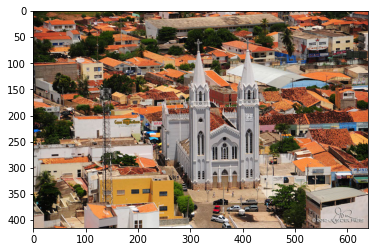

In [2]:
imagem = imread('picos.jpg')
plt.imshow(imagem)

In [5]:
claro = imread("picos_claro.jpg")
escuro = imread("picos_escuro.jpg")
medio = imread("picos_medio.jpg")
nitido = imread("picos_nitido.jpg")

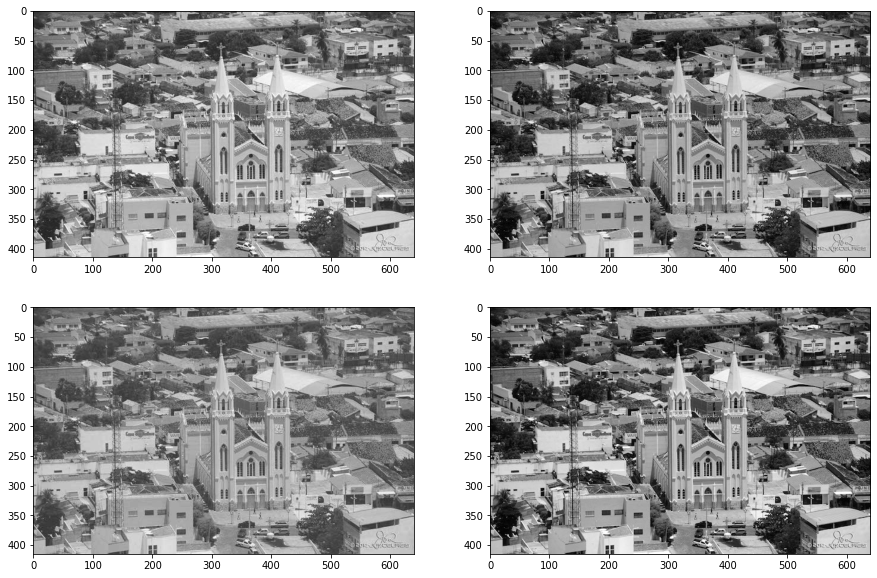

In [6]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].imshow(claro,cmap = "gray")
ax[0,1].imshow(escuro,cmap = "gray")
ax[1,0].imshow(medio,cmap = "gray")
ax[1,1].imshow(nitido,cmap = "gray")

### Como calcular o histograma de uma imagem

In [7]:
from skimage.exposure import histogram

In [14]:
hist_claro = histogram(claro)
hist_escuro = histogram(escuro,nbins=256)
hist_medio = histogram(medio,nbins=256)
hist_nitido = histogram(nitido,nbins=256)

In [17]:
hist_claro

(array([   1,    0,    0,    0,    0,    2,    4,    9,    6,   14,   31,
          39,   66,  114,  174,  242,  432,  610,  932, 1346, 1656, 2022,
        2208, 2530, 2844, 3067, 3166, 3280, 3222, 3489, 3445, 3387, 3481,
        3240, 3287, 3199, 3007, 2865, 2714, 2773, 2676, 2639, 2546, 2612,
        2564, 2564, 2565, 2640, 2707, 2704, 2664, 2720, 2844, 2817, 2865,
        2961, 2941, 2963, 2974, 2993, 3115, 3257, 3207, 3319, 3340, 3470,
        3676, 3665, 3550, 3367, 3354, 3457, 3416, 3292, 3419, 3465, 3508,
        3597, 3750, 4537, 4733, 4586, 4202, 3753, 3606, 3363, 3378, 3173,
        3156, 3271, 3086, 3262, 3223, 2979, 3222, 2957, 2889, 3178, 2681,
        2380, 1794, 1728, 1156,  890,  697,  699,  725,  658,  721,  568,
         336,  222,  202,  160,  342]),
 array([141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
 

### Como mostrar o histograma

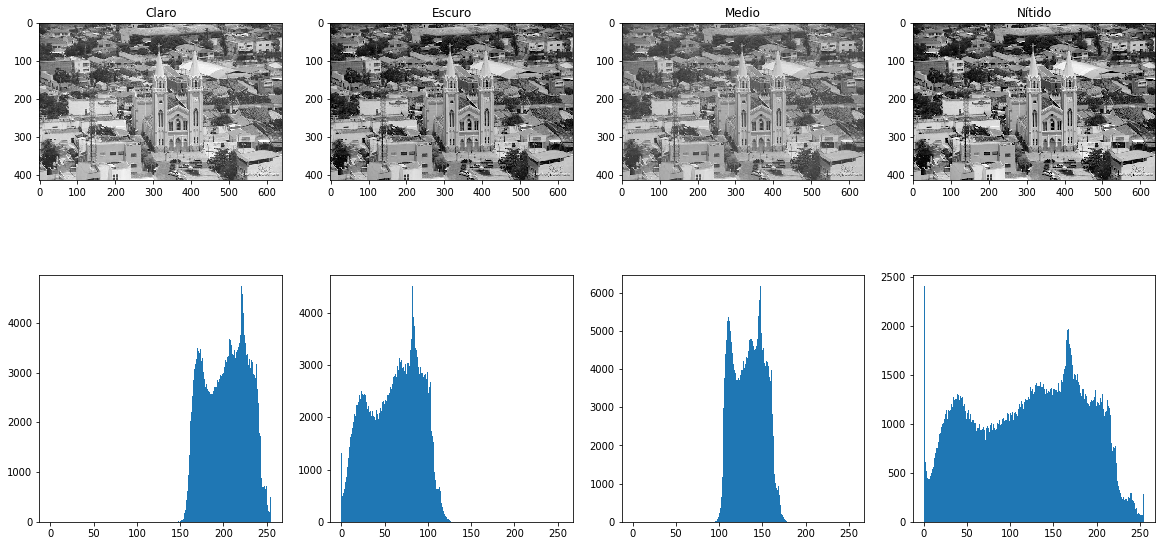

In [13]:
fig,ax = plt.subplots(2,4,figsize=(20,10))
ax[0,0].imshow(claro,cmap = "gray")
ax[0,0].set_title('Claro')
ax[0,1].imshow(escuro,cmap = "gray")
ax[0,1].set_title('Escuro')
ax[0,2].imshow(medio,cmap = "gray")
ax[0,2].set_title('Medio')
ax[0,3].imshow(nitido,cmap = "gray")
ax[0,3].set_title('Nítido')
ax[1,0].hist(claro.ravel(),range(256))
ax[1,1].hist(escuro.ravel(),range(256))
ax[1,2].hist(medio.ravel(),range(256))
ax[1,3].hist(nitido.ravel(),range(256));

#### Processamento de Histograma:

- Um histograma pode ser visto como uma função de distribuição de frequência ou como uma função de distribuição de probabilidade;

$$p(r_k)=\frac{n_k}{n}.$$

- De maneira geral dizemos que $p(r_k)$ dá uma estimativa da probabilidade de ocorrência do nível de cinza $r_k$ na imagem.

#### Propriedade do histograma:

- As informações espaciais não são representadas;

- Um histograma é único para uma determinada imagem, mas o inverso não é verdadeiro;

- A movimentação de objetos em uma imagem não tem qualquer efeito sobre o seu histograma.

## Equalização de histograma

- É uma transformação dos níveis de cinza de uma imagem que visa aumentar o intervalo dinâmico melhorando o contraste de imagens adquiridas sob péssimas condições de iluminação;
- É útil para comparar cenas que foram adquiridas com iluminação diferente (normaliza a imagem);
- De modo geral o que se procura é obter um histograma plano.

In [29]:
from skimage.exposure import equalize_hist

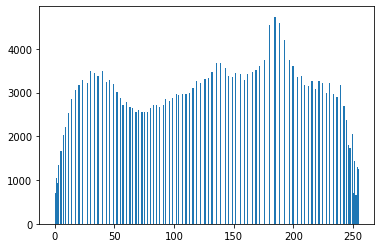

In [13]:
new_claro = equalize_hist(claro)
plt.hist(new_claro.ravel()*255,bins=256);

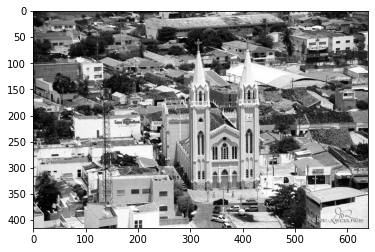

In [14]:
plt.imshow(new_claro,cmap='gray')

### Imagens do início desse notebook antes e depois da equalização.

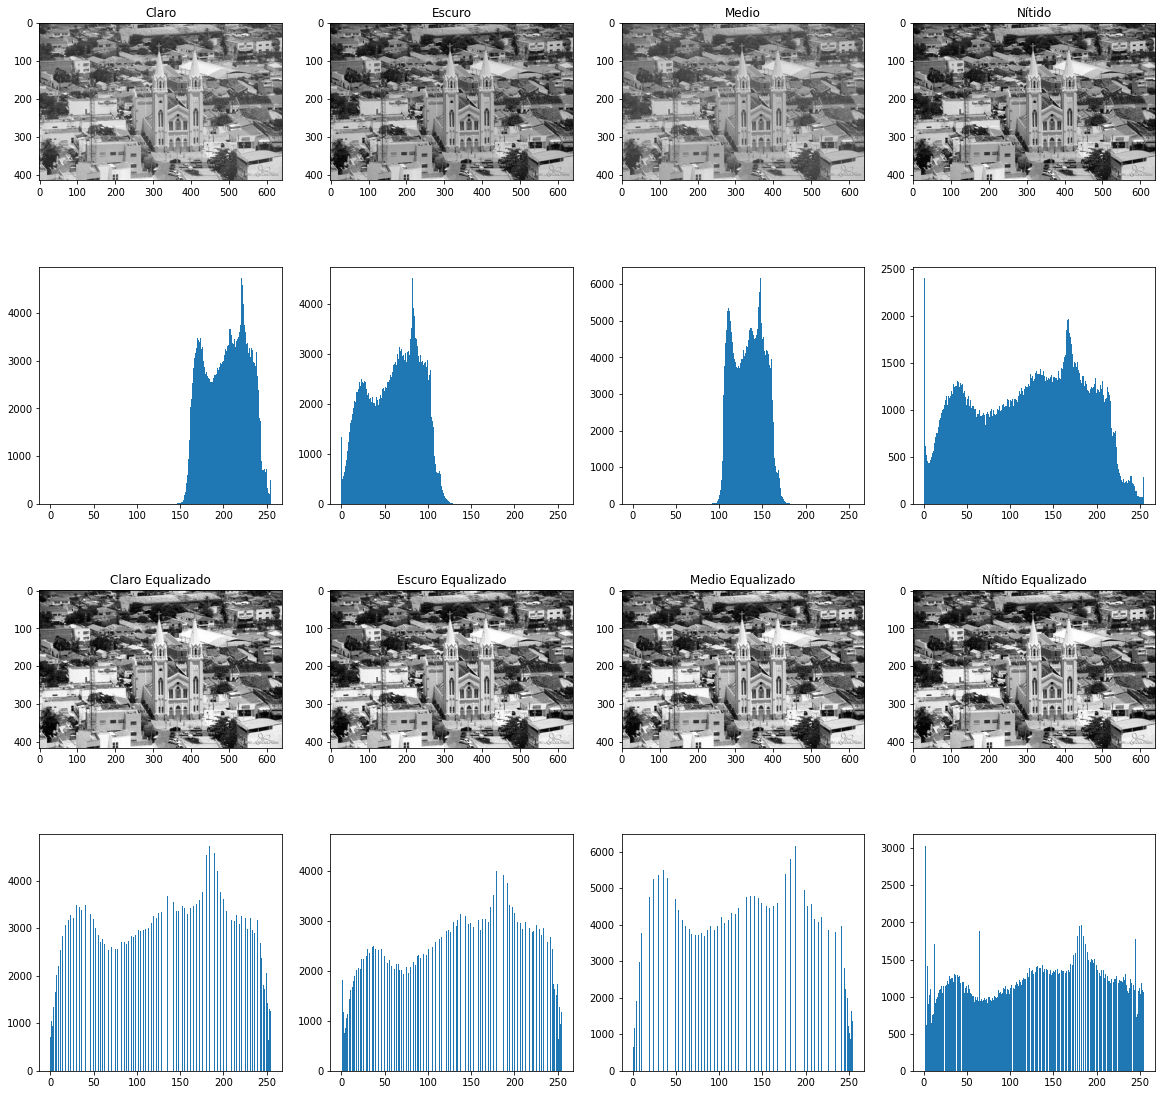

In [33]:
new_claro = equalize_hist(claro)
new_escuro = equalize_hist(escuro)
new_medio = equalize_hist(medio)
new_nitido = equalize_hist(nitido)

fig,ax = plt.subplots(4,4,figsize=(20,20))
ax[0,0].imshow(claro,cmap = "gray")
ax[0,0].set_title('Claro')
ax[0,1].imshow(escuro,cmap = "gray")
ax[0,1].set_title('Escuro')
ax[0,2].imshow(medio,cmap = "gray")
ax[0,2].set_title('Medio')
ax[0,3].imshow(nitido,cmap = "gray")
ax[0,3].set_title('Nítido')
ax[1,0].hist(claro.ravel(),range(256))
ax[1,1].hist(escuro.ravel(),range(256))
ax[1,2].hist(medio.ravel(),range(256))
ax[1,3].hist(nitido.ravel(),range(256))

ax[2,0].imshow(new_claro,cmap = "gray")
ax[2,0].set_title('Claro Equalizado')
ax[2,1].imshow(new_escuro,cmap = "gray")
ax[2,1].set_title('Escuro Equalizado')
ax[2,2].imshow(new_medio,cmap = "gray")
ax[2,2].set_title('Medio Equalizado')
ax[2,3].imshow(new_nitido,cmap = "gray")
ax[2,3].set_title('Nítido Equalizado')
ax[3,0].hist(new_claro.ravel()*255,range(256))
ax[3,1].hist(new_escuro.ravel()*255,range(256))
ax[3,2].hist(new_medio.ravel()*255,range(256))
ax[3,3].hist(new_nitido.ravel()*255,range(256));

# Atividade para Próxima aula

Pesquise e implemente a equalizalição de histograma sem utilizar funções prontas.

Entrega: 20/12/2022

### Atributos de Textura de 1$^a$ ordem

Os seguintes valores são calculado com o histograma e são largamente utilizados para representar imagens:
- Média
- Variância
- Skewness
- Kurtosis
- Energia
- Entropia




# Atividade: 

## Implementar os atributos acima em uma imagem.

In [ ]:
def descritor_histograma(imagem):
#     calcula histograma
#     calcular atributos
    return [media,var,sk,kur,ener,entr]

- Utilizar a base de imagens do trabalho anterior
- Calcular os atributos de primeira ordem para cada imagem, e criar uma matriz
- Plotar os atributos dois a dois (scatter plot)
- A entrega será:
    - Notebook com os códigos;
    - Short paper de até 4 páginas com:
        - Introdução: apresentar o problema/base escolhida;
        - Metodologia: explicar os atributos e como são calculados;
        - Resultados: resultado da classificação e scatter plots dos atributos;
        - Extra: plotar os atributos utilizando um algoritmo de redução de dimensionalidade, ex: PCA, t-SNE;
        - Conclusão.
- Entrega e apresentação: 20/12/2022

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import accuracy_score as acc

def classification(X,y):

    """
    X é uma matriz onde cada linha corresponde aos atributos calculados com o descritor
    y são os rótulos da classe de cada imagem. Exemplo [0,1,0,0,1,2,2,0,0,0,...,1]
    """
    
    # separar conjuntos de treino e teste
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)
    # criar instancia do classificador
    clf = mlp()
    # treinar o classificador
    clf.fit(X_train,y_train)
    # realizar a predicao
    pred = clf.predict(X_test)
    # calcular o resultado utilizando a acuracia
    acuracia = accuracy_score(y_test,pred)
    
    return acuracia